In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

import numpy as np
import pandas as pd

In [3]:
events_train_df = pd.read_csv('../data/event_data_train.csv')
submissions_train_df = pd.read_csv('../data/submissions_data_train.csv')

In [4]:
events_train_df.head()

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632


In [5]:
submissions_train_df.head()

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853


In [7]:
events_train_df.action.unique()

array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

In [8]:
events_train_df['date'] = pd.to_datetime(events_train_df.timestamp, unit='s')

In [10]:
events_train_df.head(1)

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48


In [13]:
print(events_train_df.date.min())
print(events_train_df.date.max())

2015-06-15 04:00:48
2018-05-19 23:33:31


In [15]:
events_train_df['day'] = events_train_df.date.dt.date

In [16]:
events_train_df.head(1)

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15


In [17]:
events_train_df.groupby('day').user_id.nunique().head()

day
2015-06-15    705
2015-06-16    526
2015-06-17    440
2015-06-18    411
2015-06-19    377
Name: user_id, dtype: int64

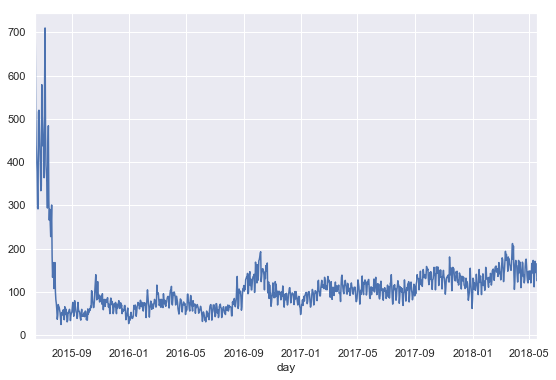

In [19]:
sb.set(rc={'figure.figsize': (9, 6)})
events_train_df.groupby('day').user_id.nunique().plot()

In [20]:
events_train_df[events_train_df.action == 'passed'] \
    .groupby('user_id', as_index=False) \
    .agg({'step_id': 'count'}) \
    .rename(columns={'step_id': 'passed_steps'}).head()

,user_id,passed_steps
0,2,9
1,3,87
2,5,11
3,7,1
4,8,84


In [32]:
pivot_table = events_train_df.pivot_table(index='user_id', columns='action', values='step_id', aggfunc='count',
                            fill_value=0).reset_index()

In [33]:
pivot_table.sort_values(['passed'], ascending=[0]).head()

action,user_id,discovered,passed,started_attempt,viewed
4089,5653,198,198,93,261
18822,26225,198,198,109,487
854,1139,198,198,77,244
1256,1715,198,198,111,389
10688,14841,198,198,109,520


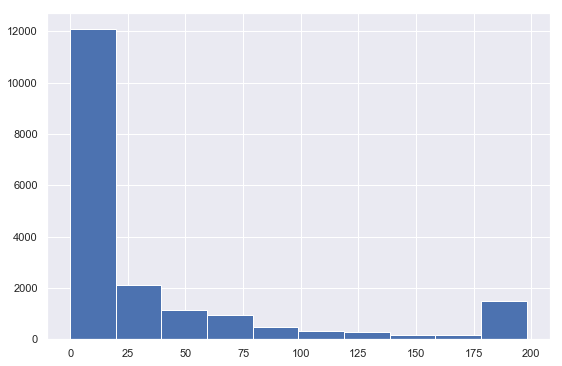

In [34]:
pivot_table.discovered.hist()

In [35]:
submissions_train_df.head()

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853


In [37]:
submissions_train_df['date'] = pd.to_datetime(submissions_train_df.timestamp, unit='s')
submissions_train_df['day'] = submissions_train_df.date.dt.date

In [38]:
submissions_train_df.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


In [40]:
user_scores = submissions_train_df.pivot_table(
                            index='user_id', 
                            columns='submission_status', 
                            values='step_id', 
                            aggfunc='count',
                            fill_value=0).reset_index()

In [45]:
user_scores.sort_values(['correct'],  ascending=[0]).head()

submission_status,user_id,correct,wrong
439,1046,421,513
2099,5552,186,93
6415,17135,168,177
2344,6183,142,65
3208,8461,135,42
